# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

# read

In [2]:
df = pd.read_csv('./Iris_cate.csv')

In [3]:
df.drop('Id', axis=1, inplace=True)
df.columns = [
    'sepal_length', 'sepal_width', 
    'petal_length', 'petal_width', 'target'
]

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Neural Network

In [5]:
np.random.seed(0)
tf.random.set_seed(0)

In [6]:
y = df['target']
X = df.drop('target', axis=1)

## encode

In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils

y = utils.to_categorical(LabelEncoder().fit_transform(y))
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## model

In [8]:
model = Sequential()

model.add(Dense(units=16, input_dim=4, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.compile(
    # loss='sparse_categorical_crossentropy', # multi-label & not one-hot encoded
    loss='categorical_crossentropy',      # multi-label & one-hot encoded
    optimizer='adam', 
    metrics=['accuracy']
)

In [9]:
stopping   = EarlyStopping(monitor='val_loss', patience=10)
model_path = './saved_model_iris/{epoch:03d}_{val_loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_weights_only=True, save_best_only=True, period=1)

In [10]:
history = model.fit(
    X, y, 
    epochs=100, 
    verbose='auto', 
    callbacks=[stopping, checkpoint], 
    validation_split=0.2, 
    shuffle=True
)

Epoch 1/100
4/4 [==============================] - 1s 85ms/step - loss: 1.2135 - accuracy: 0.4167 - val_loss: 2.0329 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 1.1387 - accuracy: 0.4167 - val_loss: 1.8564 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0769 - accuracy: 0.4167 - val_loss: 1.6825 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 1.0252 - accuracy: 0.4167 - val_loss: 1.5349 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.9875 - accuracy: 0.4167 - val_loss: 1.4253 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9610 - accuracy: 0.4167 - val_loss: 1.3403 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9343 - accuracy: 0.4167 - val_loss: 1.2991 - val_accuracy: 0.0000

In [11]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']

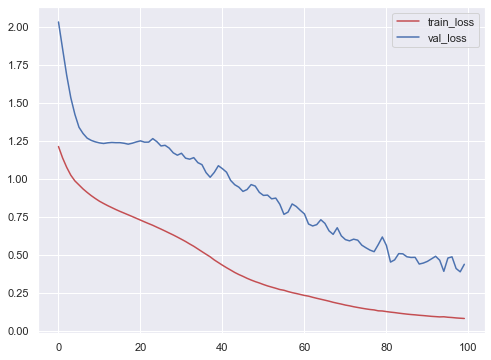

In [19]:
f = plt.subplots(figsize=(8, 6))
plt.plot(np.arange(len(train_loss)), train_loss, c='r', label='train_loss')
plt.plot(np.arange(len(train_loss)), val_loss, c='b', label='val_loss',)
plt.legend(); plt.show()

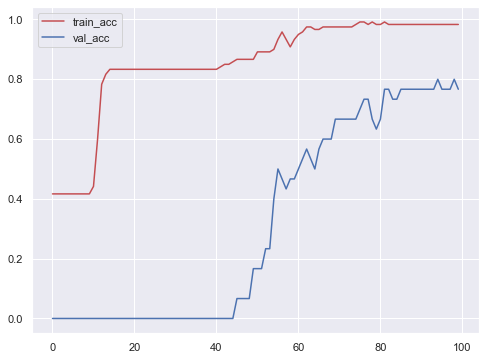

In [13]:
f = plt.subplots(figsize=(8, 6))
plt.plot(np.arange(len(train_acc)), train_acc, c='r', label='train_acc')
plt.plot(np.arange(len(train_acc)), val_acc, c='b', label='val_acc')
plt.legend(); plt.show()